In [3]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [4]:
class CCML:
    def __init__(self, iter_num, batch_size, n_neighbors, 
                 learnung_rate, space_dim=None, logs=True):
        self.iter_num = iter_num
        self.batch_size = batch_size
        self.learnung_rate = learnung_rate
        self.space_dim = space_dim
        self._matrix = None
        self.n_neighbors = n_neighbors
        self.n_classes = None
        if logs:
            self.expected_acc = np.zeros(iter_num)
            
    
    def _compute_nn_matrix(self): 
        pass
    
    def _compute_proba(self, X):
        pass
    
    def _compute_expected_acc(self, X):
        pass
    
    def fit(self, X, y, shuffle=True):
        self.n_classes = y.nunique()[0]
        print(self.n_classes)
        self._matrix = np.random.rand(self.space_dim, X.shape[1])
        print((self._matrix).shape)
        labels = np.array(y).ravel()
        
        for batch in get_mini_batches(X, labels, self.batch_size, self.iter_num):
            
            self._matrix += self.learnung_rate*self.grad_expected_acc(X, self._matrix)
            
            print('batch_1', batch[1])
            #do an optimization step
        

In [1319]:
def get_mini_batches(X, y, batch_size, amount):
    assert X.shape[0] == y.shape[0]
    
    batch_per_data = X.shape[0] // batch_size
    batch_frac_data = X.shape[0] % batch_size
    rep_num = amount
    rep_frac = amount
    if batch_frac_data:
        rep_num //= (batch_per_data + 1)
        rep_frac %= (batch_per_data + 1)
    else:
        rep_num //= (batch_per_data)
        rep_frac %= (batch_per_data)
    #print(rep_num) 
    #print(rep_frac)#, print(batch_per_data), print(batch_frac_data)
    indices = np.arange(X.shape[0])
    ret = []
    for rep in range(rep_num):
        np.random.shuffle(indices)
        #print(rep)
        #print(indices)
        for start in range(0, X.shape[0] - batch_size + 1, batch_size):
            ind = indices[start: start + batch_size]
            #print(ind)
            #yield X.iloc[ind], y.iloc[ind]
            ret.append(ind)
        if batch_frac_data:
            #print('foo')
            #print(start + batch_size)
            #print(batch_frac_data)
            rand_add = np.random.choice(X.shape[0], batch_size - batch_frac_data)
            ind = list(indices[batch_per_data*batch_size:]) + list(rand_add)
            #yield X.iloc[ind], y.iloc[ind]
            ret.append(ind)
            
    indices = np.arange(X.shape[0])
    if rep_frac:
        #print('here')
        np.random.shuffle(indices)
        start = 0
        for i in range(rep_frac):
            ind = indices[start: start + batch_size]
            #print(ind)
            start += batch_size
            #yield X.iloc[ind], y.iloc[ind]
            ret.append(ind)
    return ret    
    #for i in range(self.iter_num):
    #    indx = np.random.choice(X.shape[0], size=self.batch_size)
    #    yield X[indx], y[indx]

In [1320]:
#metric = CCML(iter_num=21, batch_size=1, space_dim=3, n_neighbors=1, learnung_rate=1e-3)

In [1321]:
dim = 100
n_samples = dim*3
#X = np.random.randint(low=0, high=100, size=(n_samples, dim))
X = np.random.rand(n_samples, dim)
y = np.random.randint(low=0, high=3, size=n_samples)
data = pd.DataFrame(X)
data['y'] = y
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,y
0,0.339667,0.772470,0.742831,0.260278,0.624316,0.331686,0.233808,0.127549,0.241530,0.379826,...,0.844941,0.914496,0.298799,0.188633,0.394281,0.941933,0.716715,0.009178,0.732671,0
1,0.346138,0.128786,0.500742,0.583491,0.329905,0.488933,0.083979,0.100692,0.979982,0.473706,...,0.677204,0.240658,0.069902,0.709829,0.924412,0.762605,0.793010,0.976828,0.831922,0
2,0.368189,0.981704,0.099517,0.591649,0.381657,0.694424,0.209090,0.309509,0.658210,0.932965,...,0.494900,0.547549,0.882688,0.583918,0.885813,0.054915,0.873847,0.534541,0.983523,2
3,0.196337,0.818294,0.066041,0.415488,0.649928,0.834731,0.329024,0.506579,0.397011,0.605327,...,0.950686,0.829392,0.075626,0.081604,0.907534,0.689147,0.607457,0.290664,0.572259,0
4,0.766407,0.468560,0.289644,0.483801,0.491791,0.740392,0.702149,0.311686,0.996997,0.855639,...,0.947994,0.262357,0.083479,0.987496,0.543459,0.418496,0.756500,0.965177,0.808652,2
5,0.120203,0.900849,0.785744,0.389488,0.579821,0.629168,0.912915,0.759989,0.528704,0.728796,...,0.420352,0.344735,0.080105,0.803500,0.388310,0.018642,0.034129,0.678098,0.499922,2
6,0.953333,0.919617,0.600819,0.977603,0.023178,0.272190,0.771321,0.658625,0.344122,0.382808,...,0.906434,0.231696,0.130399,0.158947,0.584099,0.342431,0.191259,0.188095,0.727828,2
7,0.384070,0.002053,0.178779,0.389911,0.188775,0.777200,0.339697,0.010376,0.619704,0.134486,...,0.396575,0.337793,0.641327,0.503733,0.160801,0.187426,0.743435,0.119382,0.978990,1
8,0.884014,0.776888,0.498643,0.180074,0.178503,0.852087,0.153110,0.310511,0.123591,0.331148,...,0.418837,0.966905,0.847398,0.478216,0.762870,0.911214,0.540505,0.214441,0.087010,1
9,0.537078,0.061786,0.803559,0.570095,0.658626,0.812055,0.060070,0.870495,0.923386,0.423901,...,0.116629,0.529042,0.124256,0.046934,0.659842,0.650413,0.910389,0.606357,0.731581,2


In [1322]:
X_data = data.drop(['y'],  axis=1)
y_data = data['y']
X_data.values.shape, y_data.values.shape

((300, 100), (300,))

In [1324]:
for ind in get_mini_batches(X_data, y_data, batch_size=2, amount=3):
    print(y_data.iloc[ind])

7      1
272    2
Name: y, dtype: int64
206    0
37     2
Name: y, dtype: int64
132    1
220    1
Name: y, dtype: int64


In [264]:
5%3

2

In [175]:
def part_data_by_labels(X, labels, name):
    df_X = pd.DataFrame(X)
    df_label = pd.DataFrame(labels, columns={name})
    df_tmp   = pd.concat([df_X, df_label], axis=1)
    
    res_dict = {}
    
    grpb     = df_tmp.groupby(name)
    for groups, data in grpb:
        res_dict[groups] = data.drop(axis=1, labels=name).values
    return res_dict

In [178]:
tmp = part_data_by_labels(X, y, 'y')
tmp[0]

array([[0.29589666, 0.39317775, 0.93431735, 0.68122545, 0.76920368,
        0.22920217, 0.23461561, 0.17765414, 0.58116284, 0.63677552],
       [0.79921495, 0.59852772, 0.38412387, 0.39823353, 0.44207544,
        0.48770626, 0.62184798, 0.25923577, 0.22033226, 0.40775513],
       [0.52670766, 0.17974707, 0.52537492, 0.86378496, 0.10791204,
        0.30044493, 0.59113989, 0.21124314, 0.56809325, 0.13605564]])

In [965]:
from sklearn.neighbors import NearestNeighbors as NN
def get_distances(A, partitioned_X, x_test, metric_name, k_near):
    """
    returns distances dict and indices dict
    """
    near = NN(n_neighbors=k_near, metric=metric_name)
    near_dict_idx = {}
    near_dict_dist = {}

    for key in partitioned_X.keys():
        tmp_X = partitioned_X[key]
        
        tmp_X = tmp_X.dot(A.T)
        near.fit(np.array(tmp_X))
        near_dict_dist[key], near_dict_idx[key] = near.kneighbors(A.dot(x_test).reshape(1,-1))
    return near_dict_dist, near_dict_idx

In [180]:
get_distances(np.random.rand(2, X.shape[1]), tmp, np.ones(X.shape[1]), 'euclidean', 2)

({0: array([[2.86789313, 2.99244362]]), 2: array([[2.43332764, 3.18502792]])},
 {0: array([[1, 0]]), 2: array([[1, 0]])})

In [951]:
def exp_for_proba(k, near_dict_dist, label):
    return np.exp(-1/k*np.power(near_dict_dist[label], 2).sum())

def sum_exp_for_proba(k, near_dict_dist):
    return sum(exp_for_proba(k, near_dict_dist, key) for key in near_dict_dist.keys())

def beta(A, partitioned_X, near_dict_ind, x, label):
    res = []
    Ax = A.dot(x)
    for idx in near_dict_ind[label].ravel():
        res.append((Ax - A.dot(partitioned_X[label][idx])).reshape(-1, 1).dot(x.reshape(1, -1)))
    return sum(res)

def sum_exp_for_proba_beta(A, partitioned_X, near_dict_ind, x, k, near_dict_dist):
    return sum( beta(A, partitioned_X, near_dict_ind, x, key) * exp_for_proba(k, near_dict_dist, key) for key in near_dict_dist.keys())

def proba(x_test, class_label, A, partitioned_X, n_neighbors, metric_name='euclidean'):
    near_dict_dist, near_dict_idx = get_distances(A, partitioned_X, 
                                                  x_test, 
                                                  metric_name, 
                                                  n_neighbors)
    p = exp_for_proba(n_neighbors, near_dict_dist, class_label)
    p /= sum_exp_for_proba(n_neighbors, near_dict_dist)
    return p, near_dict_dist, near_dict_idx

def P(n_neighbors, near_dict_dist, class_label):
    p = exp_for_proba(n_neighbors, near_dict_dist, class_label)
    p /= sum_exp_for_proba(n_neighbors, near_dict_dist)
    return p

def expected_acc(A, partitioned_X, n_neighbors, metric_name='euclidean'):
    acc = 0
    for key in partitioned_X.keys():
        acc += sum(proba(x, 
                         key, 
                         A,
                         partitioned_X, 
                         n_neighbors, 
                         metric_name=metric_name)[0] 
                   for x in partitioned_X[key])
    return acc

def gradE(A, data_X, labels, name, n_neighbors):
    to_sum_over_x = []
    partitioned_X = part_data_by_labels(data_X, labels, name)
    for x, label in zip(data_X, labels):#data_X.iterrows():
        pci, near_dict_dist, near_dict_ind = proba(x, label, A, partitioned_X, n_neighbors, metric_name='euclidean')
        betaci = beta(A, partitioned_X, near_dict_ind, x, label)
        numer  = sum_exp_for_proba_beta(A, partitioned_X, near_dict_ind, x, n_neighbors, near_dict_dist)
        denum  = sum_exp_for_proba(n_neighbors, near_dict_dist)
        to_sum_over_x.append(pci * betaci*(betaci - numer / denum))
    return -2/n_neighbors * sum(to_sum_over_x)

In [466]:
tst_X = np.array([
                 [1, 2, 3],
                 [1, 2, 4],
                 [3, 4, 5],
                 [3, 4, 6],
                 [6, 7, 8],
                 [6, 7, 9],
                 [9, 10, 11],
                 [1, 1, 1],
                 [1, 2, 3],
                 [1, 2, 4],
                 [3, 4, 5],
                 [3, 4, 6],
                 [6, 7, 8],
                 [6, 7, 9],
                 [9, 10, 11],
                 [1, 1, 1]
])
tst_y = ['x', 'x', 'z', 'z', 'i', 'i', '!', '!', 'x', 'x', 'z', 'z', 'i', 'i', '!', '!']

tst_dict = {}

df_X = pd.DataFrame(tst_X)
df_y = pd.DataFrame(tst_y, columns={'y'})
df_tst = pd.concat([df_X, df_y], axis=1)

In [467]:
df_tst

,0,1,2,y
0,1,2,3,x
1,1,2,4,x
2,3,4,5,z
3,3,4,6,z
4,6,7,8,i
5,6,7,9,i
6,9,10,11,!
7,1,1,1,!
8,1,2,3,x
9,1,2,4,x


In [463]:
print(y)
print(type(X))
gradE(np.random.rand(2, X.shape[1]), X, y, 'y', 1)

[2 2 0 0 0]
<class 'numpy.ndarray'>


array([[-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.]])

In [1388]:
from tqdm import tqdm_notebook
def GradAscent(less_dim, data_X, data_y, 
               n_neighbors,
               batch_size=1, 
               learning_rate=1e-3, 
               iter_num=100):
    assert less_dim < data_X.shape[0]
    A = np.random.rand(less_dim, data_X.shape[1])
    unfirom_part = part_data_by_labels(data_X, data_y, 'y')
    acc_list = [0]
    res = A.copy()
    for ind in tqdm_notebook(get_mini_batches(data_X, data_y, batch_size=batch_size, amount=iter_num)):
        X = data_X.iloc[ind].values
        y = data_y.iloc[ind].values
        grad = gradE(A, X, y.ravel(), 'y', n_neighbors)
        if np.any(np.isnan(grad)):
            break
        acc = expected_acc(A, unfirom_part, n_neighbors)
        A += learning_rate*grad
        if acc >= acc_list[-1]:
            res = A.copy()
        
        acc_list.append(acc)
    return acc_list, res

In [1368]:
print(type(X_data), type(df_X))
GradAscent(3, df_X, df_y, 
           2,
           batch_size=15,
           learning_rate=5,
           iter_num=10)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 2

In [1363]:
list(get_mini_batches(X_data, y_data, amount=2, batch_size=2))

[array([  2, 200]), array([193, 209])]

In [1364]:
for batch in get_mini_batches(df_X, df_y, amount=1, batch_size=16):
    print('foo')

foo


In [1365]:
a, A = GradAscent(3, X_data, y_data, 
           2,
           batch_size=66,
           learning_rate=0.1,
           iter_num=4)

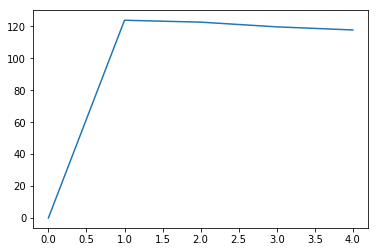

In [1366]:
plt.plot(a)

In [1333]:
from sklearn.datasets import load_digits
digits = load_digits()
mnist_X = pd.DataFrame(digits.data[:20, :])
mnist_y = pd.DataFrame(digits.target[:20])

In [1334]:
a, A = GradAscent(4, mnist_X, mnist_y, 
           2,
           batch_size=20,
           learning_rate=1,
           iter_num=4)

/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:57: RuntimeWarning: invalid value encountered in true_divide
/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:57: RuntimeWarning: invalid value encountered in true_divide
/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:57: RuntimeWarning: invalid value encountered in true_divide
/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__mai

In [1335]:
a

[]

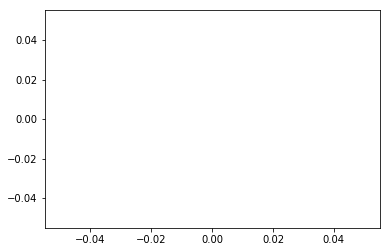

In [1336]:
plt.plot(a)

In [1380]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

wine_set = load_wine()
wine_data = pd.DataFrame(data= np.c_[wine_set['data'], wine_set['target']],
columns= wine_set['feature_names'] + ['target'])
def shuffle(df, n=1, axis=0): 
    df = df.copy()
    for _ in range(n):
        df.apply(np.random.shuffle, axis=axis)
    return df

wine_data =  pd.DataFrame(wine_set['data'])
print(wine_data.shape, type(wine_data))
print(wine_set['target'].shape)
wine_data['y'] = pd.DataFrame(wine_set['target'])


print(wine_data.shape, type(wine_data))
print(wine_set['target'].shape)

wine_X = wine_data.drop(['y'],  axis=1)
wine_X = scaler.fit_transform(wine_X)
wine_X = pd.DataFrame(wine_X)
wine_y = wine_data['y']

type(wine_X), wine_y.shape

(178, 13) <class 'pandas.core.frame.DataFrame'>
(178,)
(178, 14) <class 'pandas.core.frame.DataFrame'>
(178,)


(pandas.core.frame.DataFrame, (178,))

In [1511]:
iter_num = 100
less_dim = 12
NNs = 3
a, A = GradAscent(less_dim, pd.DataFrame(wine_X), pd.DataFrame(wine_y, columns={'y'}), 
           NNs,
           batch_size=30,
           learning_rate=1e-2,
           iter_num=iter_num)

/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:57: RuntimeWarning: invalid value encountered in true_divide


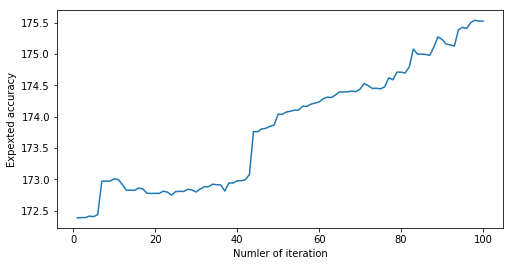

In [1470]:
plt.figure(figsize=(8, 4))
plt.plot([i for i in range(1, len(a))], a[1:])
plt.xlabel('Numler of iteration')
plt.ylabel('Expexted accuracy')
plt.savefig('exp_acc4.eps')

In [1471]:
a[-1]

175.5275554003434

In [1472]:
A.shape

(10, 13)

In [1506]:
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import accuracy_score as acc
from sklearn.decomposition import PCA
from metric_learn import NCA
from metric_learn import LMNN
from metric_learn import ITML, ITML_Supervised
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
pca.fit(wine_X)

#neigh = kNN(n_neighbors=NNs)
#neigh.fit(wine_X, wine_y)
#print(acc(wine_y, neigh.predict(wine_X)))
#print(1 - acc(wine_y, neigh.predict(wine_X)))

tr = pca.transform(wine_X)
neigh = kNN(n_neighbors=NNs)
neigh.fit(tr, wine_y)
print(acc(wine_y, neigh.predict(tr)))
print(1 - acc(wine_y, neigh.predict(tr)))

learned_wine_X = wine_X @ A.T
neigh = kNN(n_neighbors=NNs)
neigh.fit(learned_wine_X, wine_y)
print(acc(wine_y, neigh.predict(learned_wine_X)))
print(1 - acc(wine_y, neigh.predict(learned_wine_X)))

#nca = NCA(max_iter=1000, learning_rate=0.01)
#nca.fit(wine_X, wine_y)
#nca_wine_X = nca.transform(wine_X)
#neigh = kNN(n_neighbors=NNs)
#neigh.fit(nca_wine_X, wine_y)
#print(acc(wine_y, neigh.predict(nca_wine_X)))
#print(1 - acc(wine_y, neigh.predict(nca_wine_X)))



0.9719101123595506
0.028089887640449396
0.9662921348314607
0.0337078651685393


In [1442]:
from sklearn.datasets import load_digits
digits = load_digits()


wine_X = wine_data.drop(['y'],  axis=1)
wine_X = scaler.fit_transform(wine_X)
wine_X = pd.DataFrame(wine_X)
wine_y = wine_data['y']

mnist_data = pd.DataFrame(digits.data)
mnist_data['y'] = pd.DataFrame(digits.target)
mnist_y = pd.DataFrame(digits.target)

mnist_X = mnist_data.drop(['y'],  axis=1)
mnist_X = scaler.fit_transform(mnist_X)
mnist_X = pd.DataFrame(mnist_X)
mnist_y = mnist_data['y']

In [1445]:
iter_num = 10
less_dim = 10
NNs = 3
a, A = GradAscent(less_dim, pd.DataFrame(mnist_X), pd.DataFrame(mnist_y, columns={'y'}), 
           NNs,
           batch_size=100,
           learning_rate=1e-2,
           iter_num=iter_num)

/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:57: RuntimeWarning: invalid value encountered in true_divide
/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/olya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:57: RuntimeWarning: invalid value encountered in true_divide


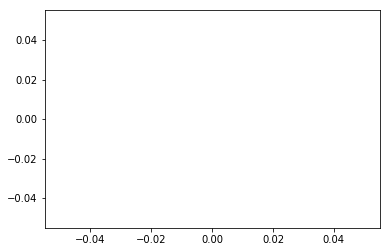

In [1446]:
plt.plot(a[1:])

In [1508]:
b = [0.2078651685393258, 
     0.1797752808988764, 
     0.1179775280898876, 
     0.1348314606741573,
     0.0856573459563482, 
     0.050561797752809, 
     0.0561797752808989, 
     0.0449438202247191, 
     0.0462135914358685, 
     0.0337078651685393, 
     0.0786516853932584,
     0.05617977528089885]

b = np.array(b)*100

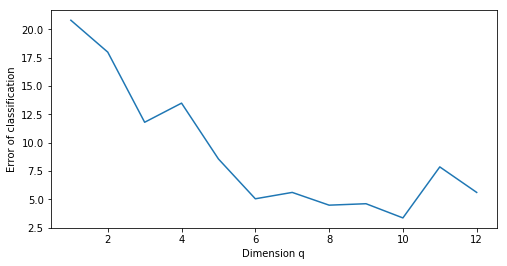

In [1509]:
plt.figure(figsize=(8, 4))
plt.plot([i for i in range(1, len(b) + 1)], b)
plt.xlabel('Dimension q')
plt.ylabel('Error of classification')
plt.savefig('q.eps')

In [1507]:
(0.0337078651685393 + 0.0786516853932584)/2

0.05617977528089885